In [12]:
class FuzzyInput:
    def __init__(self, name, xs, ys, x0):
        self.name = name
        self.xs = xs
        self.ys = ys
        self.mu = self.calcMu(x0)
        
    def calcMu(self, x0):
        # x0 < prvi xs, vracamo prvi ys
        if x0 <= self.xs[0]:
            return self.ys[0]
        # x0 > poslednji xs, vracamo poslednji ys
        elif x0 > self.xs[-1]:
            return self.ys[-1]
        
        # rasponi (x1, x2): [1, 7], [7, 10], [10, 12], [12, 15]...
        for i in range(len(self.xs) - 1):
            x1 = self.xs[i]
            x2 = self.xs[i+1]
            
            if x1 <= x0 and x0 <= x2:
                y1 = self.ys[i]
                y2 = self.ys[i+1]
                if y1 == y2:
                    return y1
                
                elif y1 < y2:
                    return (x0 - x1) / (x2 - x1)
                
                else:
                    return (x2 - x0) / (x2 - x1)

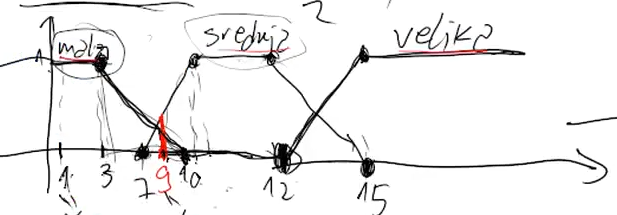

In [14]:
x = FuzzyInput('mala', [3, 10], [1, 0], 9)
x.mu

0.14285714285714285

In [38]:
from enum import Enum, unique

@unique
class LogicOperator(Enum):
    AND = 0
    OR = 1

In [45]:
class Rule():
    def __init__(self, input1, input2, output, operator):
        self.input1 = input1
        self.input2 = input2
        self.output = output
        
        if (operator == LogicOperator.AND):
            self.output.mu = max(output.mu, min(input1.mu, input2.mu))
        else:
            self.output.mu = min(output.mu, max(input1.mu, input2.mu))

In [46]:
class FuzzyOutput:
    def __init__(self, name, xs, ys):
        self.name = name
        self.xs = xs
        self.ys = ys
        self.mu = 0
        
        # prosek x-eva tamo gde je y=1
        self.c = 0
        
        n=0
        for x, y in zip(self.xs, self.ys):
            if y==1:
                self.c += x
                n = n + 1
        self.c /= n 

In [47]:
x = FuzzyOutput('iz', [7, 15], [1, 0])
x.c

7.0

In [48]:
potrosnja = []
potrosnja.append(FuzzyInput('mala', [3,10],[1,0],9))
potrosnja.append(FuzzyInput('srednja', [7,10,12,15],[0,1,1,0],9))
potrosnja.append(FuzzyInput('velika', [12,15],[0,1],9))

pouzdanost = []
pouzdanost.append(FuzzyInput('visoka', [5,10],[1,0], 8))
pouzdanost.append(FuzzyInput('niska', [8,15],[0,1], 8))

vrednost = []
vrednost.append(FuzzyOutput('mala', [7,15],[1,0]))
vrednost.append(FuzzyOutput('srednja', [7,15,25,40],[0,1,1,0]))
vrednost.append(FuzzyOutput('velika', [25,40],[0,1]))

rules = []
rules.append(Rule(potrosnja[0], pouzdanost[0], vrednost[2], LogicOperator.AND))
rules.append(Rule(potrosnja[0], pouzdanost[1], vrednost[1], LogicOperator.AND))
rules.append(Rule(potrosnja[1], pouzdanost[0], vrednost[1], LogicOperator.AND))
rules.append(Rule(potrosnja[1], pouzdanost[1], vrednost[1], LogicOperator.AND))
rules.append(Rule(potrosnja[2], pouzdanost[0], vrednost[1], LogicOperator.AND))
rules.append(Rule(potrosnja[2], pouzdanost[1], vrednost[0], LogicOperator.AND))

In [49]:
for i in range(len(vrednost)):
    print(vrednost[i].mu)

0
0.4
0.14285714285714285


In [50]:
import numpy as np

In [53]:
def defuzzify():
    iznad = 0
    ispod = 0
    
    for v in vrednost:
        iznad += v.c * v.mu
        ispod += v.mu
        
    return iznad/ispod

In [54]:
defuzzify()

25.26315789473684